In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from skimage import io
from skimage.feature import hog
from joblib import Parallel, delayed
#import cv2
#import glob
from scipy import signal
import seaborn as sns
import scipy as sp
from pandas import DataFrame as df

#load all data
pos1 = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/F.npy")
pos1_iscell = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/iscell.npy")
pos1_spks = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/spks.npy")
pos1_stat = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/plane0/stat.npy")
pos1_ops = np.load("I:/Imaging/ARCHIVE_processed/NDn1_an1/pos1/suite2p/suite2p/ops1.npy")


#remove all non-cells
pos1_cellsF = pos1[pos1_iscell[:,0] == 1]
pos1_cellsS = pos1_spks[pos1_iscell[:,0] == 1]
pos1_stat = pos1_stat[pos1_iscell[:,0] == 1]


#convert all data to dataframes
pos1_cellsF = pd.DataFrame(pos1_cellsF)
pos1_cellsS = pd.DataFrame(pos1_cellsS)
pos1_stat = pd.DataFrame(pos1_stat)
pos1_ops = pd.DataFrame(pos1_ops)



#since suite2p stiches all exps together and img recording last longer than exps
#(tipically 7500 frames while exp only lasts 7178 frames as recorded by ThorSync)
#find frame# for each exp start by checking the number of frames in each stack/folder
pos1_2_recLen = 7178
pos1_cutStartVec = [0, 7500, 15000, 22500, 30002, 37502, 45002, 52502, 60002]
#pos2_cutStartVec = [0, 7477, 14977, 22477, 29977, 37477, 44977, 52477, 59977]



#slice stiched output from suite2p into experiments and remove all timepoints after exp/cameras stopped recording
#names correspond to stimulus substance given during that experiment 
pos1_h20_th_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[0] : (pos1_cutStartVec[0] + pos1_2_recLen)]
pos1_nacl75_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[1] : (pos1_cutStartVec[1] + pos1_2_recLen)]
pos1_nacl500_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[2] : (pos1_cutStartVec[2] + pos1_2_recLen)]
pos1_q01_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[3] : (pos1_cutStartVec[3] + pos1_2_recLen)]
pos1_q1_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[4] : (pos1_cutStartVec[4] + pos1_2_recLen)]
pos1_q10_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[5] : (pos1_cutStartVec[5] + pos1_2_recLen)]
pos1_suc1_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[6] : (pos1_cutStartVec[6] + pos1_2_recLen)]
pos1_suc4_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[7] : (pos1_cutStartVec[7] + pos1_2_recLen)]
pos1_suc20_1_F = pos1_cellsF.iloc[:,pos1_cutStartVec[8] : (pos1_cutStartVec[8] + pos1_2_recLen)]




#rename columns from original frame# out of whole stiched recording to 0:expLength
pos1_h20_th_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_nacl75_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_nacl500_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_q01_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_q1_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_q10_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_suc1_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_suc4_1_F.columns = range(pos1_h20_th_1_F.shape[1])
pos1_suc20_1_F.columns = range(pos1_h20_th_1_F.shape[1])



#import stimulus starts
shockStartsEmpathy_2s = [120*30, (120*2 + 1*2)*30, (120*3 + 2*2)*30]
shockStartsEmpathy_500ms = [120*30, (120*2 + 1*0.5)*30, (120*3 + 2*0.5)*30]
shockStartsEmpathy_500ms = [int(i) for i in shockStartsEmpathy_500ms]



NDn1_an1_pos1_h20_th_1 = np.zeros(14578)

#resample img data to fit the sampling rate of face data
# rows = neurons, columns = activity, upsampled from face data
pos1_h20_th_1_Fr = pd.DataFrame(signal.resample(pos1_h20_th_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_nacl75_1_Fr = pd.DataFrame(signal.resample(pos1_nacl75_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_nacl500_1_Fr = pd.DataFrame(signal.resample(pos1_nacl500_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_q01_1_Fr = pd.DataFrame(signal.resample(pos1_q01_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_q1_1_Fr = pd.DataFrame(signal.resample(pos1_q1_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_q10_1_Fr = pd.DataFrame(signal.resample(pos1_q10_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_suc1_1_Fr = pd.DataFrame(signal.resample(pos1_suc1_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_suc4_1_Fr = pd.DataFrame(signal.resample(pos1_suc4_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))
pos1_suc20_1_Fr = pd.DataFrame(signal.resample(pos1_suc20_1_F, len(NDn1_an1_pos1_h20_th_1), axis = 1))



C:\Users\adarcher\AppData\Local\conda\conda\envs\suite2p\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\adarcher\AppData\Local\conda\conda\envs\suite2p\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\adarcher\AppData\Local\conda\conda\envs\suite2p\lib\site-packages\scipy\signal\signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

In [2]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
%matplotlib inline
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [3]:
#normalized to first pre-stim baseline
# concatenation: just for visualization
#s1 = top.iloc[:,3300:4200]; s2 = top.iloc[:,6960:7860]; s3 = top.iloc[:,10620:11520];
#stim = pd.concat([s1,s2,s3], axis = 1)

#sns.clustermap(stim, col_cluster=False, robust = True, vmin = 1)

In [4]:
#normalized to respective pre-stimulus period
x0 = pos1_h20_th_1_Fr
s1_r = x0.iloc[:,3300:4200]; s2_r = x0.iloc[:,6960:7860]; s3_r = x0.iloc[:,10620:11520]

s1_z = [(s1_r.iloc[i,:] - s1_r.iloc[i,:][:299].mean()) / s1_r.iloc[i,:][:299].std() for i in range(len(s1_r))]
s2_z = [(s2_r.iloc[i,:] - s2_r.iloc[i,:][:299].mean()) / s2_r.iloc[i,:][:299].std() for i in range(len(s2_r))]
s3_z = [(s3_r.iloc[i,:] - s3_r.iloc[i,:][:299].mean()) / s3_r.iloc[i,:][:299].std() for i in range(len(s3_r))]
s_all_z = pd.DataFrame(np.concatenate((s1_z, s2_z, s3_z), axis=0))
s_all_z.shape

(2223, 900)

In [5]:
#s_all_map = sns.clustermap(s_all_z, col_cluster=False, robust = True, vmin = 1)

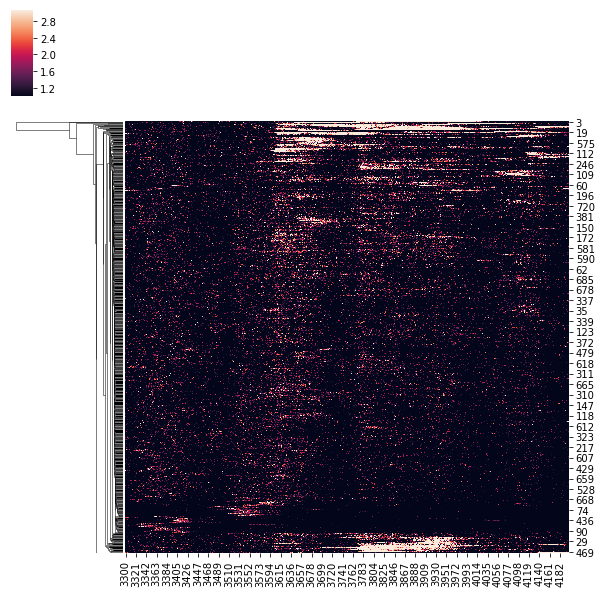

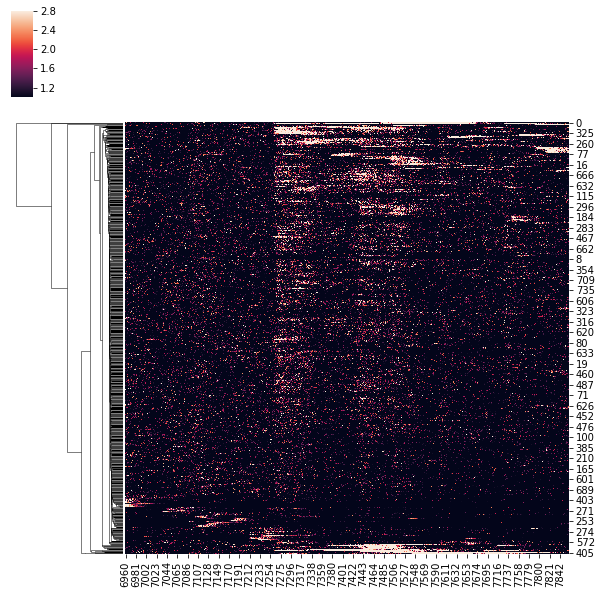

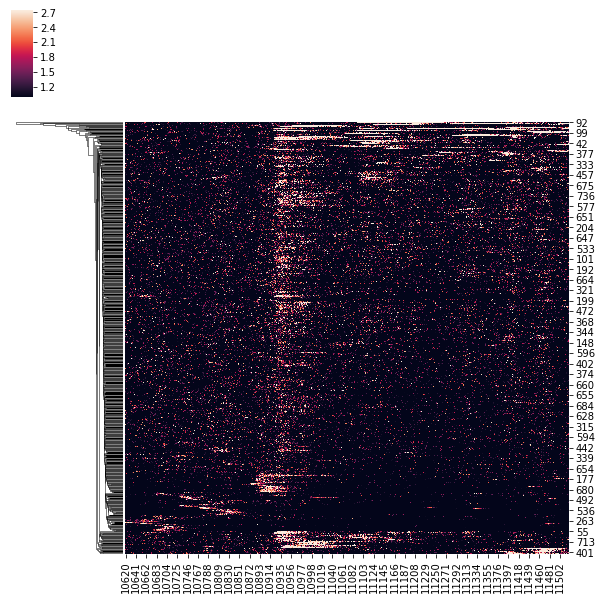

In [6]:
# take top 200 cells from stimulus presentation separately
s1_z = pd.DataFrame(s1_z)
s2_z = pd.DataFrame(s2_z)
s3_z = pd.DataFrame(s3_z)

s1 = sns.clustermap(s1_z, col_cluster=False, robust = True, vmin = 1)
s2 = sns.clustermap(s2_z, col_cluster=False, robust = True, vmin = 1)
s3 = sns.clustermap(s3_z, col_cluster=False, robust = True, vmin = 1)

n1 = s1.dendrogram_row.reordered_ind
s1_reorder = s1_z.reindex(n1)
s1_top = s1_reorder[:200]

n2 = s2.dendrogram_row.reordered_ind
s2_reorder = s2_z.reindex(n2)
s2_top = s2_reorder[:200]

n3 = s3.dendrogram_row.reordered_ind
s3_reorder = s3_z.reindex(n3)
s3_top = s3_reorder[:200]



In [7]:
# Q: are the top 200 cells the same across each stim presentation? 
n1 = n1[:200]
n2 = n2[:200]
n3 = n3[:200]

shared_a = [n1[i] for i in range(len(n1)) if n1[i] in n2]
len(shared_a)
shared_h20 = [shared_a[i] for i in range(len(shared_a)) if shared_a[i] in n3]
print(shared_h20)
print(len(shared_h20))

shared_s1 = s1_z.reindex(shared_h20)
shared_s2 = s2_z.reindex(shared_h20)
shared_s3 = s3_z.reindex(shared_h20)



[92, 191, 113, 7, 254, 223, 103, 399, 544, 371, 250, 325, 174, 42, 50, 595, 474, 102, 296, 417, 220, 444, 25, 519, 131, 285, 268, 249, 739]
29


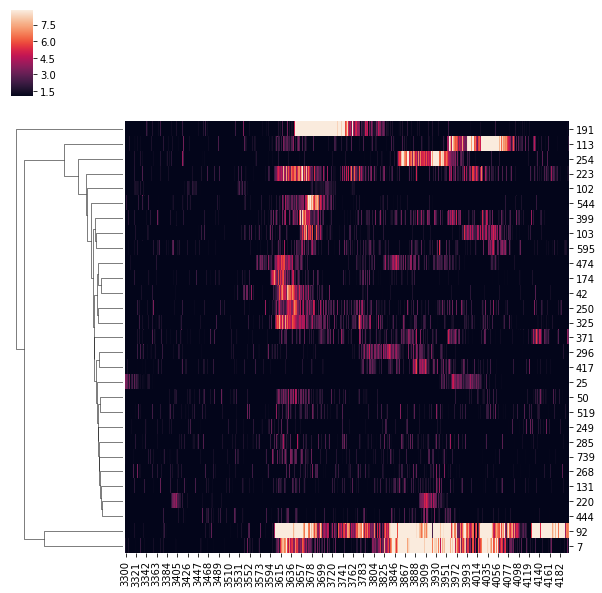

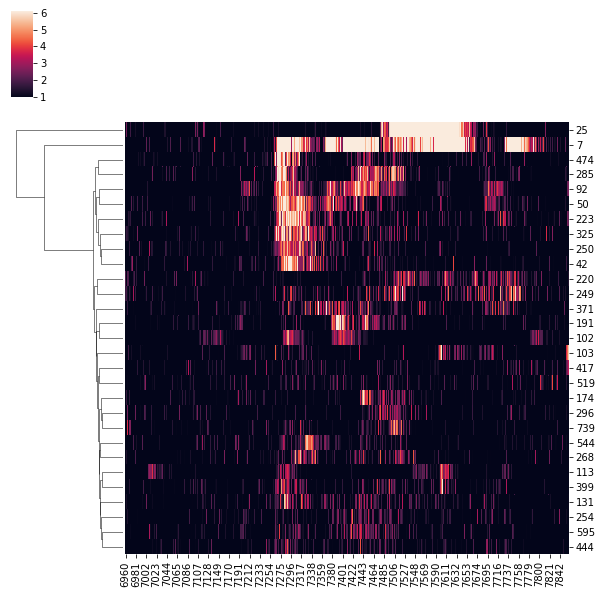

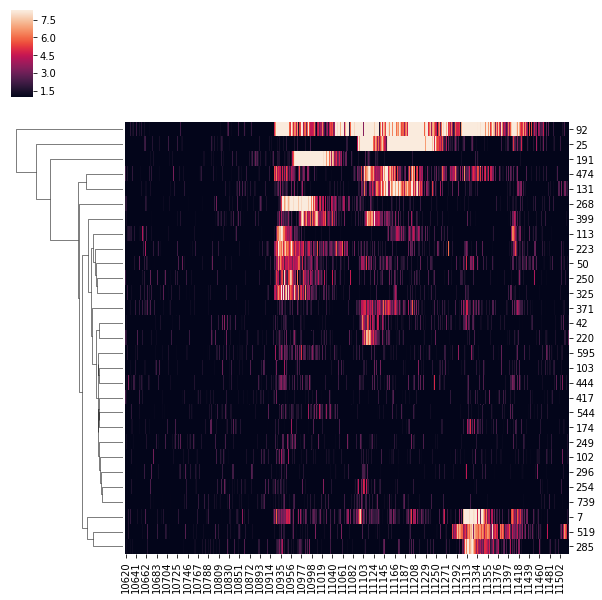

In [8]:
sns.clustermap(shared_s1, col_cluster=False, robust = True, vmin = 1)
sns.clustermap(shared_s2, col_cluster=False, robust = True, vmin = 1)
sns.clustermap(shared_s3, col_cluster=False, robust = True, vmin = 1)

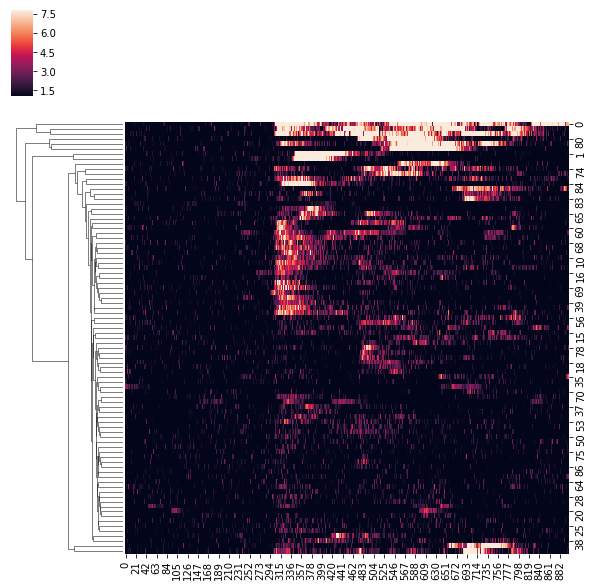

In [9]:
shared_all = np.concatenate([shared_s1,shared_s2,shared_s3], axis=0)
shared_all = pd.DataFrame(shared_all)
sns.clustermap(shared_all, col_cluster=False, robust = True, vmin = 1)

[2, 44, 8, 81, 203, 258, 223, 103, 560, 257, 82, 26, 175, 85, 129, 453, 74, 597, 432, 145, 728, 297, 181, 152, 211, 698]
26


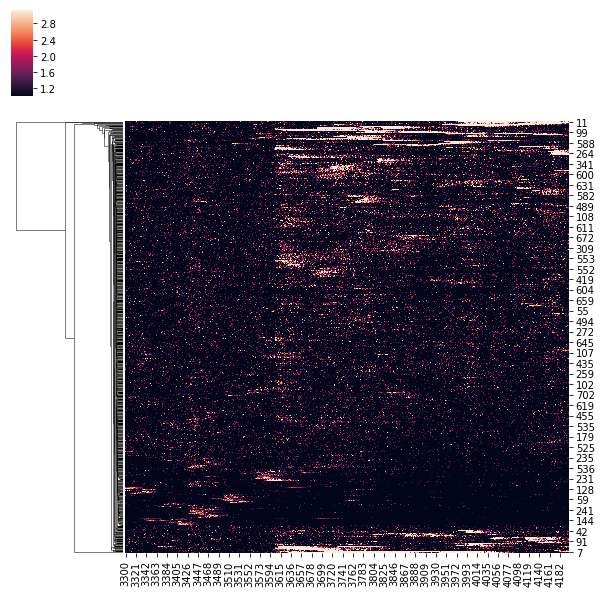

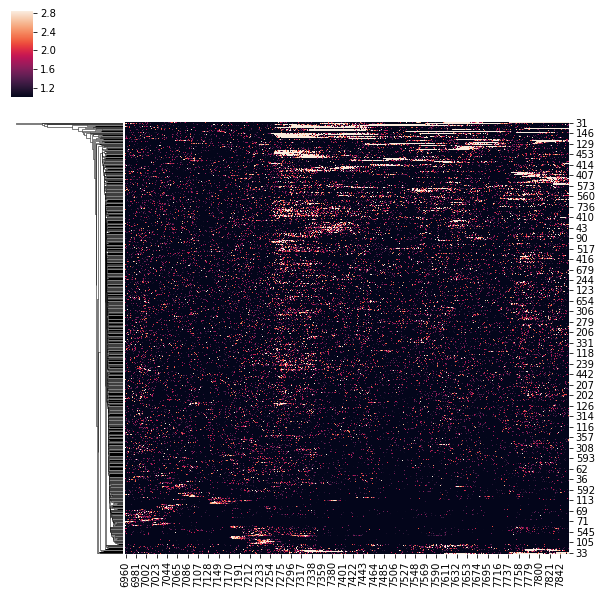

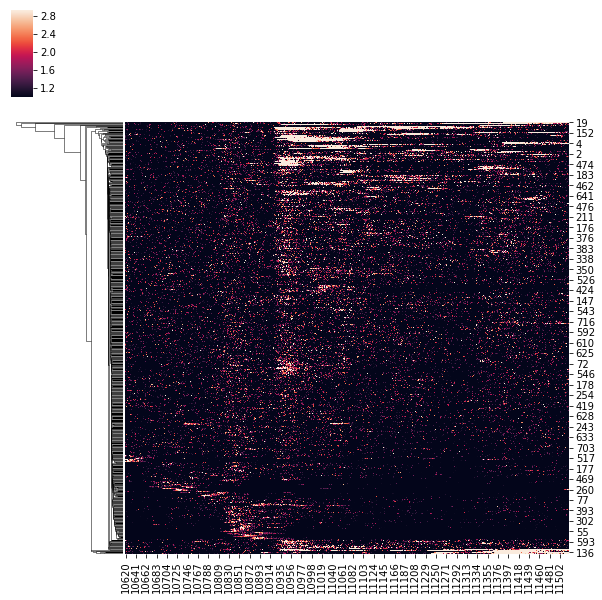

In [10]:
# Q: are these cells common in stim pres for other sustances/concentrations?

## sucrose, lowest
#normalized to respective pre-stimulus period
x0 = pos1_suc1_1_Fr 
s1_r = x0.iloc[:,3300:4200]; s2_r = x0.iloc[:,6960:7860]; s3_r = x0.iloc[:,10620:11520]

s1_z = [(s1_r.iloc[i,:] - s1_r.iloc[i,:][:299].mean()) / s1_r.iloc[i,:][:299].std() for i in range(len(s1_r))]
s2_z = [(s2_r.iloc[i,:] - s2_r.iloc[i,:][:299].mean()) / s2_r.iloc[i,:][:299].std() for i in range(len(s2_r))]
s3_z = [(s3_r.iloc[i,:] - s3_r.iloc[i,:][:299].mean()) / s3_r.iloc[i,:][:299].std() for i in range(len(s3_r))]
s_all_z = pd.DataFrame(np.concatenate((s1_z, s2_z, s3_z), axis=0))
s_all_z.shape

# take top 200 cells from stimulus presentation separately
s1_z = pd.DataFrame(s1_z)
s2_z = pd.DataFrame(s2_z)
s3_z = pd.DataFrame(s3_z)

s1 = sns.clustermap(s1_z, col_cluster=False, robust = True, vmin = 1)
s2 = sns.clustermap(s2_z, col_cluster=False, robust = True, vmin = 1)
s3 = sns.clustermap(s3_z, col_cluster=False, robust = True, vmin = 1)

n1 = s1.dendrogram_row.reordered_ind
s1_reorder = s1_z.reindex(n1)
s1_top = s1_reorder[:200]

n2 = s2.dendrogram_row.reordered_ind
s2_reorder = s2_z.reindex(n2)
s2_top = s2_reorder[:200]

n3 = s3.dendrogram_row.reordered_ind
s3_reorder = s3_z.reindex(n3)
s3_top = s3_reorder[:200]

n1 = n1[:200]
n2 = n2[:200]
n3 = n3[:200]

shared_a = [n1[i] for i in range(len(n1)) if n1[i] in n2]
len(shared_a)
shared_suc = [shared_a[i] for i in range(len(shared_a)) if shared_a[i] in n3]
print(shared_suc)
print(len(shared_suc))

shared_s1 = s1_z.reindex(shared_suc)
shared_s2 = s2_z.reindex(shared_suc)
shared_s3 = s3_z.reindex(shared_suc)



In [11]:
shared = [shared_h20[i] for i in range(len(shared_h20)) if shared_h20[i] in shared_suc]
print(shared)
print(len(shared))

[223, 103]
2


In [12]:
# Q: are the cells common in stim presentation common in ISI? 
